In [ ]:
#Sandoval_Santos_Jacqueline 23150293

df = pd.read_csv("https://raw.githubusercontent.com/Jacqueline030409/Estadistica-Inferencial-II/refs/heads/main/mental_health.csv")
df.dropna(inplace = True) 
df


,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized
0,Afghanistan,AFG,1990,0.223206,4.996118,4.713314,0.703023,0.127700
1,Afghanistan,AFG,1991,0.222454,4.989290,4.702100,0.702069,0.123256
2,Afghanistan,AFG,1992,0.221751,4.981346,4.683743,0.700792,0.118844
3,Afghanistan,AFG,1993,0.220987,4.976958,4.673549,0.700087,0.115089
4,Afghanistan,AFG,1994,0.220183,4.977782,4.670810,0.699898,0.111815
...,...,...,...,...,...,...,...,...
6415,Zimbabwe,ZWE,2015,0.201042,3.407624,3.184012,0.538596,0.095652
6416,Zimbabwe,ZWE,2016,0.201319,3.410755,3.187148,0.538593,0.096662
6417,Zimbabwe,ZWE,2017,0.201639,3.411965,3.188418,0.538589,0.097330
6418,Zimbabwe,ZWE,2018,0.201976,3.406929,3.172111,0.538585,0.097909


Coeficiente de correlación:  0.1204

Coeficiente de determinación:  0.0145

Intervalo de confianza para b1 de  95%
 0.1079 < b1 <  0.1639

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0007



c:\Users\peto_\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6150.
  res = hypotest_fun_out(*samples, **kwds)


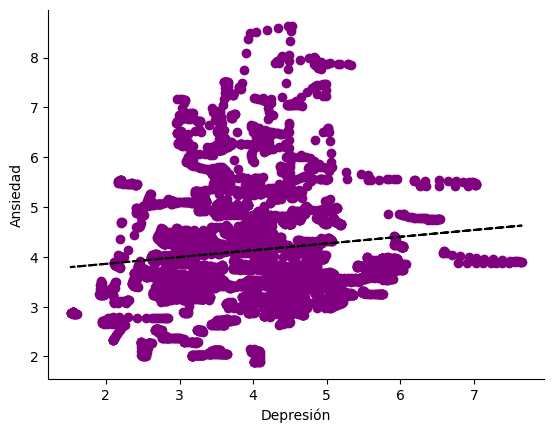

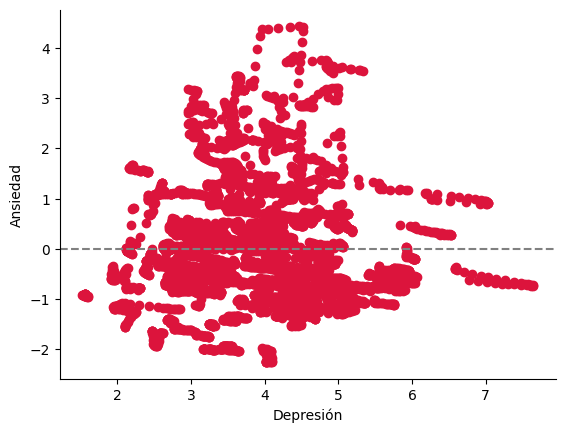

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/Jacqueline030409/Estadistica-Inferencial-II/refs/heads/main/mental_health.csv")
df.dropna(inplace = True) 
df

X= df["Depressive disorders (share of population) - Sex: Both - Age: Age-standardized"]
Y= df["Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized"]

plt.scatter(X, Y, color = 'purple')
plt.xlabel('Depresión')
plt.ylabel('Ansiedad')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

from scipy.stats import pearsonr
r, _ = pearsonr(X, Y)
print(f'Coeficiente de correlación: {r: 0.4f}\n')

print(f'Coeficiente de determinación: {r ** 2: 0.4f}\n')

import statsmodels.api as sm
x_constante = sm.add_constant(X)
modelo = sm.OLS(Y, x_constante).fit()

b0, b1 = modelo.params

fun = lambda x: b0 + b1 * x

Yc = fun(X)

plt.plot(X, Yc, color = 'black', linestyle = '--')

nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

residuales = modelo.resid
plt.figure()
plt.scatter(X, residuales, color = 'crimson')
plt.xlabel('Depresión')
plt.ylabel('Ansiedad')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(y = 0, color = 'gray', linestyle = '--')

from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# A) Hipótesis general: Los trastornos depresivos (X) pueden tener un impacto significativo en la aparición de trastornos de ansiedad (Y). 
# Es decir, un aumento en la frecuencia o severidad de los trastornos depresivos podría estar relacionado con una mayor probabilidad de desarrollar trastornos de ansiedad.

# H0: Los trastornos depresivos influyen en la probabilidad de desarrollar trastornos de ansiedad, lo que implica que existe una relación causal 
# en la que los síntomas depresivos favorecen la aparición o el agravamiento de los trastornos de ansiedad.

# H1: No hay una relación significativa entre los trastornos depresivos y los trastornos de ansiedad; 
# la presencia de depresión no afecta el desarrollo de un trastorno de ansiedad.

# Dado que el coeficiente de correlación es bajo (𝑟=0.1204) y el coeficiente de determinación también es reducido (𝑅2=0.0145), 
# la conexión entre ambas variables es débil. Esto indica que, aunque pueda haber cierta relación entre la depresión y la ansiedad, 
# existen otros factores más determinantes que explican la variabilidad de los trastornos de ansiedad. Por lo tanto, se rechaza H0.

# E) El coeficiente de correlación de 0.1204 muestra una relación muy débil y positiva entre ambas variables. Esto significa que, 
# aunque hay una ligera tendencia a que un aumento en una variable esté acompañado de un aumento en la otra, la relación es prácticamente insignificante.

# E) Un 𝑅2 de 0.0145 (equivalente al 1.45%) indica que solo el 1.45% de la variabilidad de la variable dependiente es explicada por la variable independiente, 
# mientras que el 98.55% de la variabilidad se debe a otros factores no considerados en el modelo.

# F) Como el intervalo de confianza no incluye el valor 0, se puede descartar la hipótesis nula 𝐻0: B1 = 0, 
# lo que implica que existe una relación significativa entre ambas variables. Sin embargo, el efecto es pequeño, 
# lo que sugiere que otros factores además de los trastornos depresivos podrían estar incidiendo en el desarrollo de los trastornos de ansiedad.

# G) 
# Linealidad: No puede evaluarse directamente sin un gráfico de residuos, pero el bajo coeficiente de determinación (R2 = 0.0145) sugiere 
# que la relación entre las variables podría no ser lineal.
# Normalidad: No se cumple, ya que los residuos no siguen una distribución normal.
# Homoscedasticidad: No se cumple, pues los residuos presentan una variabilidad no constante.

